# Chapter 3 Probability Mass Functions

## Intro
Another way to represent a distribution is a **probability mass function** (PMF), which maps from each value to its probability. A **probability** is a frequency expressed as a fraction of the sample size, n. To get from frequencies to probabilities, we divide through by n, which is called **normalization**.

In [1]:
list_ = [1, 2, 2, 3, 5]

Given a list create PMF (remember that to do so you will have to first calculate a hist):

In [2]:
def prob_mass(list):
    dict = {}
    for value in list:
        if value not in dict:
            dict[value] = 0
        dict[value] += 1
    for key in dict:
        dict[key] /= len(list) 
    return dict

In [3]:
prob_mass(list_)

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [4]:
#Trying with a different list to make sure it works
a = [1,1,2,3,4,4,4,4,4]
b = prob_mass(a)
print(b)

{1: 0.2222222222222222, 2: 0.1111111111111111, 3: 0.1111111111111111, 4: 0.5555555555555556}


Compare your result with the `Pmf` function provided by `thinkstats2`

In [5]:
import thinkstats2

In [6]:
pmf = thinkstats2.Pmf(list_)
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [7]:
pmf1 = thinkstats2.Pmf(a)
pmf1

Pmf({1: 0.2222222222222222, 2: 0.1111111111111111, 3: 0.1111111111111111, 4: 0.5555555555555556})

What is the total probability of a PMF? Calculate it for our PMF:

In [8]:
sm = 0
for key in b:
    sm += b[key]
print(sm)

1.0


Try the methods from the `Pmf` class:
- `pmf.Prob()`: Show the probability associated
- `pmf.Incr()`: Increase the probability a quantity
- `pmf.Mult()`: Increase the probability by a multiplier

In [9]:
pmf.Prob(2)

0.4

In [10]:
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

In [11]:
pmf.Incr(2, 0.1)
pmf

Pmf({1: 0.2, 2: 0.5, 3: 0.2, 5: 0.2})

In [12]:
pmf.Mult(1, 2)
pmf

Pmf({1: 0.4, 2: 0.5, 3: 0.2, 5: 0.2})

If you modify a PMF, the result may not be normalized; that is, the probabilities may no longer add up to 1. To check, you can call `pmf.Total`, which returns the sum of the probabilities:

In [13]:
pmf.Total()

1.3

To renormalize, call Normalize:

In [14]:
print(pmf)
pmf.Normalize()

Pmf({1: 0.4, 2: 0.5, 3: 0.2, 5: 0.2})


1.3

In [15]:
print(pmf.Total())
print(pmf)

1.0
Pmf({1: 0.3076923076923077, 2: 0.3846153846153846, 3: 0.15384615384615385, 5: 0.15384615384615385})


`Pmf` objects provide a **Copy in memory** method so you can make and modify a copy without affecting the original.

In [16]:
pmf.Copy()

Pmf({1: 0.3076923076923077, 2: 0.3846153846153846, 3: 0.15384615384615385, 5: 0.15384615384615385})

## Plotting PMFs

Use the seaborn library and your knowledge on data plotting to create the best graph you can of the PMF curve.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/javi/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [18]:
pmf = thinkstats2.Pmf(list_) # if you don't put this cell the graphs are diferent due to the normalization and the copy method

/home/javi/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


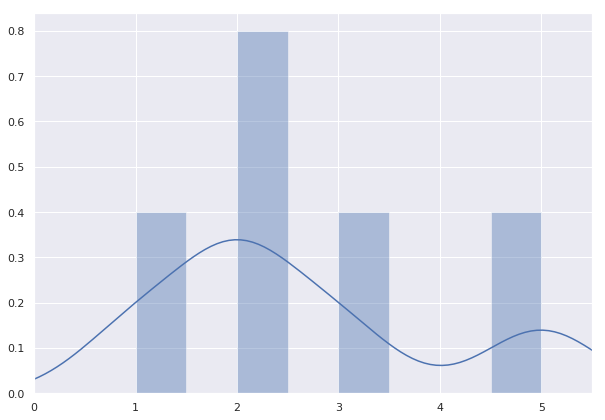

In [50]:
fig = plt.figure(figsize = (10,7))

sns.set(style ='darkgrid')
sns.distplot(list_, bins = 8, norm_hist = True)

plt.xlim(0, 5.5)
plt.show()

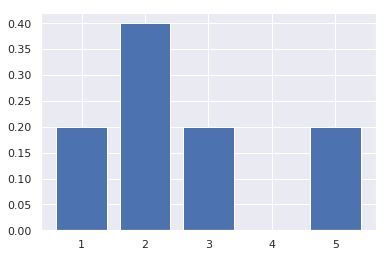

In [20]:
plt.bar(list(prob_mass(list_).keys()), list(prob_mass(list_).values()))
plt.show()

Put everything into a function:

In [21]:
def plotter(dict_input):
    list_dictval = list(dict_input.values())
    list_dictkey = list(dict_input.keys())
    plt.bar(list_dictkey, list_dictval)
    return plt.show()

Try the `thinkplot` charts of the PMF and compare the results. `thinkplot` provides two ways to plot PMFs:
- To plot a PMF as a bar graph, you can use `thinkplot.Hist()`. Bar graphs are most useful if the number of values in the PMF is small.
- To plot a PMF as a step function, you can use `thinkplot.Pmf()`. This option is most useful if there are a large number of values and the PMF is smooth. This function also works with `Hist` objects.

In [22]:
import thinkplot

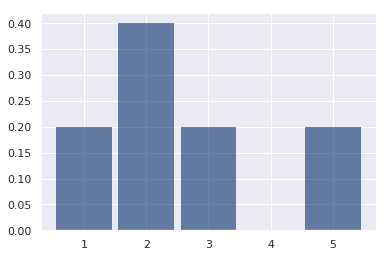

In [23]:
thinkplot.Hist(pmf)

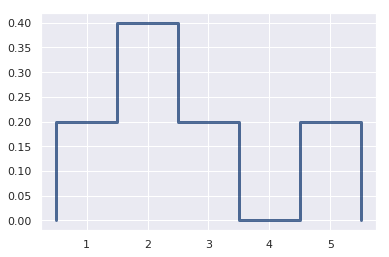

In [24]:
thinkplot.Pmf(pmf)

In addition, `pyplot` provides a function called `hist` that takes a sequence of values, computes a histogram, and plots it. Since I use `His`t objects, I usually don’t use `pyplot.hist`.

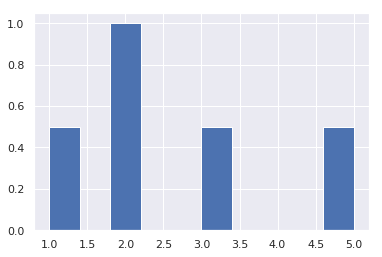

In [25]:
plt.hist(list_, density = True)
plt.show()

By plotting the PMF instead of the histogram, we can compare the two distributions without being mislead by the difference in sample size. Based on this figure, `first_babies` seem to be less likely than `others` to arrive on time (week 39) and more likely to be a late (weeks 41 and 42).

Code a graph comparing the PMF between first babies and not first babies lenght of the pregnancy:

In [26]:
import nsfg

In [27]:
preg = nsfg.ReadFemPreg(dct_file='../Think_Stats/Thinkstats2/2002FemPreg.dct',
                      dat_file='Thinkstats2/2002FemPreg.dat.gz',
                       clean = True)

preg1 = preg[(preg['birthord'] == 1) & (preg['outcome'] == 1)]
preg2 = preg[(preg['birthord'] != 1) & (preg['outcome'] == 1)]

first_pmf = prob_mass(preg1['prglngth'])
other_pmf = prob_mass(preg2['prglngth'])

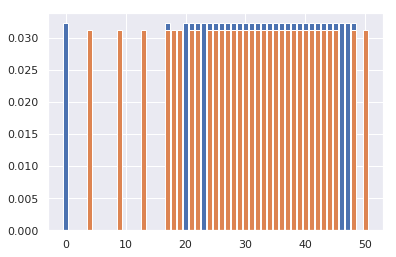

In [28]:
plt.bar(list(prob_mass(first_pmf).keys()), list(prob_mass(first_pmf).values()))
plt.bar(list(prob_mass(other_pmf).keys()), list(prob_mass(other_pmf).values()))
plt.show()

Compare your plot with the one created by `thinkplot`:

No handles with labels found to put in legend.


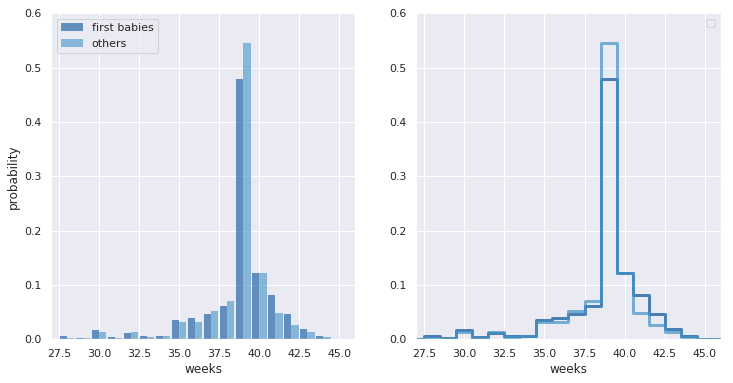

<Figure size 576x432 with 0 Axes>

In [29]:
first_pmf = thinkstats2.Pmf(preg1['prglngth'])
other_pmf = thinkstats2.Pmf(preg2['prglngth'])

width = 0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width = width, label = 'first babies')
thinkplot.Hist(other_pmf, align='left', width = width, label = 'others')
thinkplot.Config(xlabel='weeks',
                 ylabel='probability',
                 axis=[27, 46, 0, 0.6])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks',
axis=[27, 46, 0, 0.6])

In [30]:
first_pmf

Pmf({39: 0.47903920235667347, 40: 0.12145932472241106, 41: 0.08157715839564922, 38: 0.0616360752322683, 37: 0.04713346929526399, 42: 0.04645365964196692, 36: 0.03897575345569907, 35: 0.03602991162474507, 43: 0.01971447994561523, 30: 0.016542034896895538, 32: 0.012463176977113076, 34: 0.006571493315205076, 33: 0.0063448900974393836, 28: 0.005438477226376614, 44: 0.005211874008610923, 26: 0.0036256514842510764, 31: 0.003399048266485384, 29: 0.0020394289598912306, 24: 0.0015862225243598459, 45: 0.0013596193065941536, 22: 0.0006798096532970768, 48: 0.0006798096532970768, 20: 0.00022660321776569228, 47: 0.00022660321776569228, 17: 0.00022660321776569228, 21: 0.00022660321776569228, 25: 0.00022660321776569228, 46: 0.00022660321776569228, 23: 0.00022660321776569228, 27: 0.00022660321776569228, 0: 0.00022660321776569228})

In [31]:
prob_mass(first_pmf)

{39: 0.03225806451612903,
 40: 0.03225806451612903,
 41: 0.03225806451612903,
 38: 0.03225806451612903,
 37: 0.03225806451612903,
 42: 0.03225806451612903,
 36: 0.03225806451612903,
 35: 0.03225806451612903,
 43: 0.03225806451612903,
 30: 0.03225806451612903,
 32: 0.03225806451612903,
 34: 0.03225806451612903,
 33: 0.03225806451612903,
 28: 0.03225806451612903,
 44: 0.03225806451612903,
 26: 0.03225806451612903,
 31: 0.03225806451612903,
 29: 0.03225806451612903,
 24: 0.03225806451612903,
 45: 0.03225806451612903,
 22: 0.03225806451612903,
 48: 0.03225806451612903,
 20: 0.03225806451612903,
 47: 0.03225806451612903,
 17: 0.03225806451612903,
 21: 0.03225806451612903,
 25: 0.03225806451612903,
 46: 0.03225806451612903,
 23: 0.03225806451612903,
 27: 0.03225806451612903,
 0: 0.03225806451612903}

`PrePlot()` takes optional parameters rows and cols to make a grid of figures, in this case one row of two figures. The first figure (on the left) displays the PMFs using `thinkplot.Hist()`, as we have seen before.

The second call to `PrePlot()` resets the color generator. Then `SubPlot()` switches to the second figure (on the right) and displays the PMFs using `thinkplot.Pmfs()`. I used the `axis` option to ensure that the two figures are on the same axes, which is generally a good idea if you intend to compare
two figures.

## Other visualizations

Histograms and PMFs are useful while you are exploring data and trying to identify patterns and relationships. Once you have an idea what is going on, a good next step is to design a visualization that makes the patterns you have identified as clear as possible.

In the `NSFG` data, the biggest differences in the distributions are near the mode. So it makes sense to zoom in on  that part of the graph, and to transform the data to emphasize differences.

Calculate in a barchart the differences between both graphs between week 35 and 41.

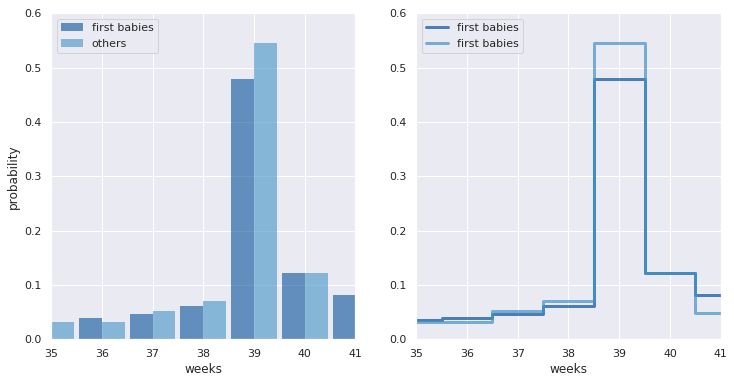

<Figure size 576x432 with 0 Axes>

In [32]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width = width, label = 'first babies')
thinkplot.Hist(other_pmf, align='left', width = width, label = 'others')
thinkplot.Config(xlabel='weeks',
ylabel ='probability',
axis =[35, 41, 0, 0.6])
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Show(xlabel='weeks',
axis =[35, 41, 0, 0.6])

In [33]:
first_pmf

Pmf({39: 0.47903920235667347, 40: 0.12145932472241106, 41: 0.08157715839564922, 38: 0.0616360752322683, 37: 0.04713346929526399, 42: 0.04645365964196692, 36: 0.03897575345569907, 35: 0.03602991162474507, 43: 0.01971447994561523, 30: 0.016542034896895538, 32: 0.012463176977113076, 34: 0.006571493315205076, 33: 0.0063448900974393836, 28: 0.005438477226376614, 44: 0.005211874008610923, 26: 0.0036256514842510764, 31: 0.003399048266485384, 29: 0.0020394289598912306, 24: 0.0015862225243598459, 45: 0.0013596193065941536, 22: 0.0006798096532970768, 48: 0.0006798096532970768, 20: 0.00022660321776569228, 47: 0.00022660321776569228, 17: 0.00022660321776569228, 21: 0.00022660321776569228, 25: 0.00022660321776569228, 46: 0.00022660321776569228, 23: 0.00022660321776569228, 27: 0.00022660321776569228, 0: 0.00022660321776569228})

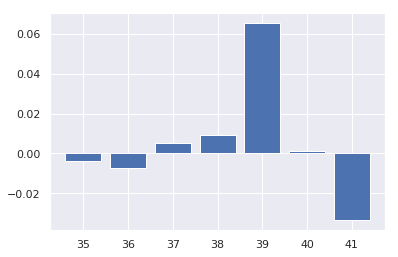

In [34]:
diff = []
for i in range(35,42):
     diff.append(other_pmf[i] - first_pmf[i])
    
plt.bar(range(35,42), diff)
plt.show()

What conclusions can we get from the graph?

###### First babies a bit longer

For now we should hold this conclusion only tentatively. We used the same dataset to identify an apparent difference and then chose a visualization that
makes the difference apparent. We can’t be sure this effect is real; it might be due to random variation. We’ll address this concern later.

## The class size paradox

Before we go on, I want to demonstrate one kind of computation you can do with `Pmf` objects; I call this example the “class size paradox.”

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10. There are two reasons for the discrepancy:
- Students typically take 4–5 classes per semester, but professors often teach 1 or 2.
- The number of students who enjoy a small class is small, but the number of students in a large class is (ahem!) large.

The first effect is obvious, at least once it is pointed out; the second is more subtle. Let’s look at an example. Suppose that a college offers 65 classes in a given semester, with the following distribution of sizes:
![alt text](notebookpics/classsizes.png "Title")

If you ask to Dean for the average class size, he would construct a PMF, compute the mean, and report that the average class size is 23.7. Calculate it yoursef given:

In [35]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2}

In [36]:
def jmean(dict):
    sm = 0
    for key in dict:
        sm += key * dict[key]
    return sm/sum(dict.values())

In [37]:
jmean(d)

23.692307692307693

Plot now this PMF:

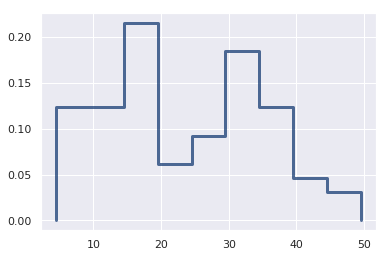

In [38]:
thinkplot.Pmf(thinkstats2.Pmf(d))

But if you survey a group of students, ask them how many students are in their classes, and compute the mean, you would think the average class was bigger. Let’s see how much bigger.

Now, compute the distribution as observed by students, where the probability associated with each class size is “biased” by the number of students in the class.

Code the PMF of the class size observed by students. (Hint: For each class size,`key`, we multiply the probability by `value`, the number of students who observe that class size.) The result should be a PMF with the biased distribution:

In [39]:
sm = []
for key in d:
    sm += [key]*(d[key]*key)
print(sm)    

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,

Compute the mean:

In [40]:
import numpy as np

In [41]:
np.mean(sm)

29.123376623376622

Compare in a graph this PMF with the actual PMF of the class sizes.

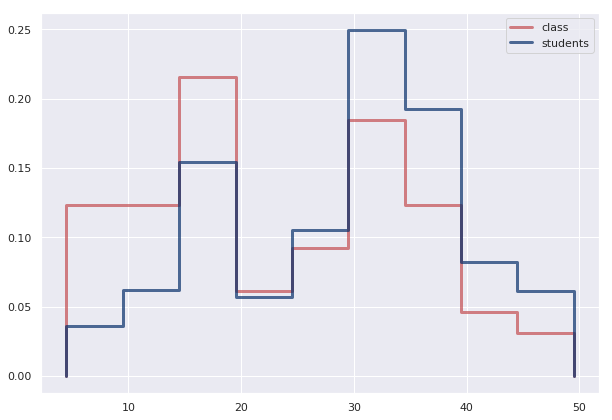

In [42]:
plt.figure(figsize =(10,7))
thinkplot.Pmf(thinkstats2.Pmf(d), label ='class', color='r')
thinkplot.Pmf(thinkstats2.Pmf(sm), label ='students')
plt.legend()
plt.show()

It is also possible to invert this operation. Suppose you want to find the distribution of class sizes at a college, but you can’t get reliable data from Dean. An alternative is to choose a random sample of students and ask how many students are in their classes.

The result would be biased for the reasons we’ve just seen, but you can use it to estimate the actual distribution. Here’s the function that unbiases a PMF:

In [43]:
def UnbiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
    new_pmf.Normalize()
    return new_pmf

Use it with your PMF with the biased distribution and compareit with the PMF of `d`:

In [44]:
thinkstats2.Pmf(sm)

Pmf({7: 0.03636363636363636, 12: 0.06233766233766234, 17: 0.15454545454545454, 22: 0.05714285714285714, 27: 0.10519480519480519, 32: 0.24935064935064935, 37: 0.19220779220779222, 42: 0.08181818181818182, 47: 0.06103896103896104})

In [45]:
thinkstats2.Pmf(d)

Pmf({7: 0.12307692307692308, 12: 0.12307692307692308, 17: 0.2153846153846154, 22: 0.06153846153846154, 27: 0.09230769230769231, 32: 0.18461538461538463, 37: 0.12307692307692308, 42: 0.046153846153846156, 47: 0.03076923076923077})

In [46]:
UnbiasPmf(thinkstats2.Pmf(sm),'Bias')

Pmf({7: 0.12307692307692304, 12: 0.12307692307692307, 17: 0.21538461538461534, 22: 0.061538461538461535, 27: 0.09230769230769229, 32: 0.1846153846153846, 37: 0.12307692307692308, 42: 0.04615384615384614, 47: 0.030769230769230767})

It’s similar to `BiasPmf`; the only difference is that it divides each probability by `x` instead of multiplying.

## Exercises

### 1)
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [47]:
resp = nsfg.ReadFemResp(dct_file='../Think_Stats/Thinkstats2/2002FemResp.dct',
                      dat_file='Thinkstats2/2002FemResp.dat.gz')

In [48]:
num_under18 = resp['numkdhh'].values

pmf_under18 = thinkstats2.Pmf(num_under18)

In [ ]:
pmf_under_18 = prob_mass(num_under18)

plotter(pmf_under_18)
jmean(pmf_under_18)

In [ ]:
new_under18 = pmf_under18.Copy()

for x,p in pmf_under18.Items():
    new_under_18.Mult(x, x)
new_under18

In [ ]:
new_under18.Normalize()
new_under18

In [ ]:
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf_under18, align='right', width=5)
thinkplot.Hist(new_under18, align='left', width=5)
thinkplot.Config(xlabel='Under 18',
                ylabel='probability')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([pmf_under18, new_under18])
thinkplot.Show(xlabel='Under 18')

### 2)
So far we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:
![alt text](notebookpics/pmfmean.png "Title")
where the x i are the unique values in the PMF and pi = PMF(xi). Similarly, you can compute variance like this:
![alt text](notebookpics/pmfvar.png "Title")
Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.


In [ ]:
def PmfMean(input_):
    pass

In [ ]:
PmfMean(pmf_under_18)

In [ ]:
def PmfVar(input_):
    pass

In [ ]:
PmfVar(pmf_under_18)

Compare the results with the np.mean and np.var functions to make sure it works

In [ ]:
np.mean(resp['numkdhh'].values)

In [ ]:
np.var(resp['numkdhh'].values)

### 3)
I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [ ]:
# Solution goes here

### 4)
In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [ ]:
import relay

results = relay.ReadResults()
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

In [ ]:
pmf = thinkstats2.Pmf(speeds, 'actual speeds')
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Speed (mph)', ylabel='PMF')

In [ ]:
# Solution goes here

###### Javier Fernández Suárez